# MiniDataChallengeSteering 

- author Sylvie Dagoret-Campgne
- date : July 1st 2018

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
%matplotlib inline

In [2]:
from astropy.io import fits

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 1.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [5]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [6]:
class redirect_output(object):
    """context manager for reditrecting stdout/err to files"""


    def __init__(self, stdout='', stderr=''):
        self.stdout = stdout
        self.stderr = stderr

    def __enter__(self):
        self.sys_stdout = sys.stdout
        self.sys_stderr = sys.stderr

        if self.stdout:
            sys.stdout = open(self.stdout, 'w')
        if self.stderr:
            if self.stderr == self.stdout:
                sys.stderr = sys.stdout
            else:
                sys.stderr = open(self.stderr, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout = self.sys_stdout
        sys.stderr = self.sys_stderr

# Initialisation

## Python Packages

In [7]:
PATH_LSSTFiltersKG='./LSSTFiltersKG'
PATH_ATMPARAMSIM='./atmparamsim'
PATH_ATMTRANSPSIM='./libradtransim'
PATH_CADENCE='./cadence'
PATH_LSSTPHOTO='./lsstphotometry'
PATH_SED='./pysynphotsed'

In [8]:
sys.path.append(PATH_LSSTFiltersKG)
sys.path.append(PATH_ATMPARAMSIM)
sys.path.append(PATH_ATMTRANSPSIM)
sys.path.append(PATH_CADENCE)
sys.path.append(PATH_LSSTPHOTO)
sys.path.append(PATH_SED)

In [9]:
import simuatmparam
import libsimulateTranspLSSTScattAbsAer as atmtranspsim

## Input file

In [10]:
cadence_file=os.path.join(PATH_CADENCE,'cadence_field1000.csv')

In [11]:
sed_file=os.path.join(PATH_SED,'sedgrid_phoenixmodels_good.fits')

## Output file

In [12]:
cadence_atm_program_file='cadence_field1000_atm.csv'

# Decode the Cadence program

In [13]:
df=pd.read_csv(cadence_file,index_col=False)

In [14]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


In [15]:
df1=df[['nights','filter']]

In [16]:
NbAtmConditions=df1.count()
print NbAtmConditions

nights    912
filter    912
dtype: int64


In [17]:
df1.describe()

,nights
count,912.000000
mean,1996.481360
std,1006.667221
min,173.000000
25%,1223.000000
50%,2030.500000
75%,2798.000000
max,3627.000000


In [18]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


In [19]:
max_nights=df1['nights'].max()

In [20]:
nbins=max_nights

In [21]:
nbins=df1.nights.max()-df1.nights.min()

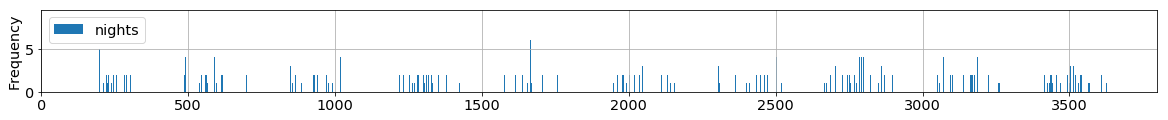

In [22]:
df1.plot.hist('nights',bins=nbins,grid=True,histtype='bar')

In [23]:
dfu=df1[df1['filter']=='u']
dfg=df1[df1['filter']=='g']
dfr=df1[df1['filter']=='r']
dfi=df1[df1['filter']=='i']
dfz=df1[df1['filter']=='z']
dfy=df1[df1['filter']=='y']

# See the sequence

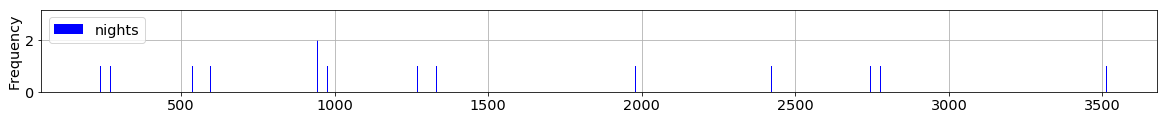

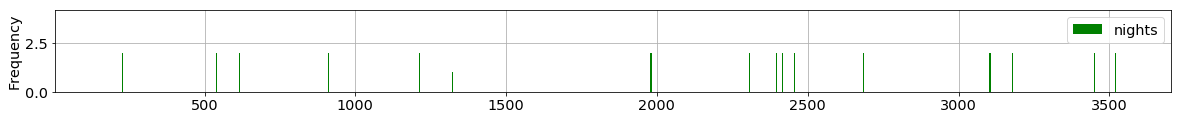

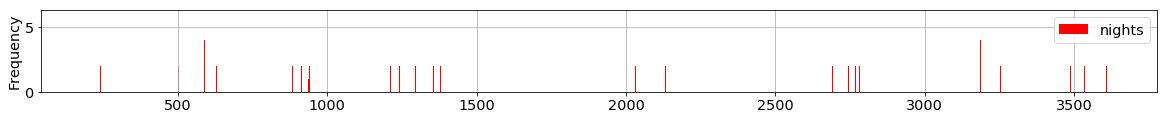

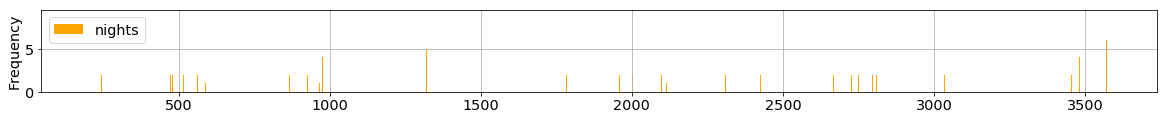

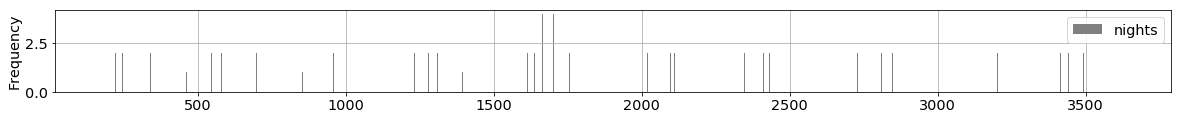

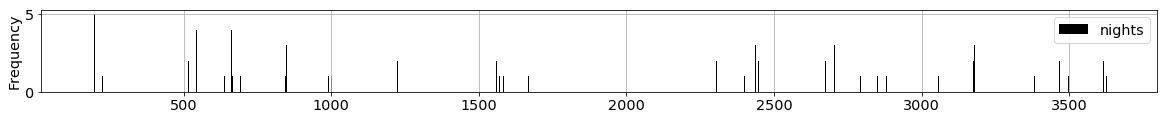

In [24]:
dfu.plot.hist('nights',bins=nbins,grid=True,color='blue',lw=3,histtype='bar',label='u')
dfg.plot.hist('nights',bins=nbins,grid=True,color='green',lw=3,histtype='bar',label='g')
dfr.plot.hist('nights',bins=nbins,grid=True,color='red',lw=3,histtype='bar',label='r')
dfi.plot.hist('nights',bins=nbins,grid=True,color='orange',lw=3,histtype='bar',label='i')
dfz.plot.hist('nights',bins=nbins,grid=True,color='grey',lw=3,histtype='bar',label='z')
dfy.plot.hist('nights',bins=nbins,grid=True,color='black',lw=3,histtype='bar',label='y')

# Access to atmospheric simulation parameters

In [25]:
%load_ext autoreload
%autoreload 1
%aimport simuatmparam

In [26]:
with redirect_output("my_output.txt"):   
    %run ./atmparamsim/simuatmparam.py -n 912 -a AOD 

<Figure size 1440x108 with 0 Axes>

In [27]:
#cat my_output.txt

In [28]:
VAOD=np.loadtxt('AOD.txt')
#VAOD=np.random.shuffle(VAOD)

In [29]:
with redirect_output("my_output.txt"):   
    %run ./atmparamsim/simuatmparam.py -n 912 -a O3 

In [30]:
O3=np.loadtxt('TO3.txt')
#O3=np.random.shuffle(O3)

In [31]:
with redirect_output("my_output.txt"):
    %run ./atmparamsim/simuatmparam.py -n 912 -a PWV 

In [32]:
PWV=np.loadtxt('TQV.txt') 
#PWV=np.random.shuffle(PWV)

In [33]:
with redirect_output("my_output.txt"):
    %run ./atmparamsim/simuatmparam.py -n 912 -a CLOUDS

In [34]:
CLOUDS=np.loadtxt('TAUTOT.txt') 
#CLOUDS=np.random.shuffle(CLOUDS)

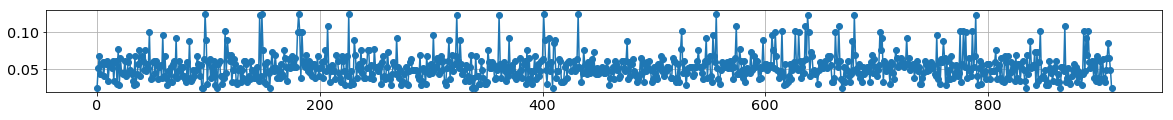

In [35]:
plt.plot(VAOD,'o-')
plt.grid()

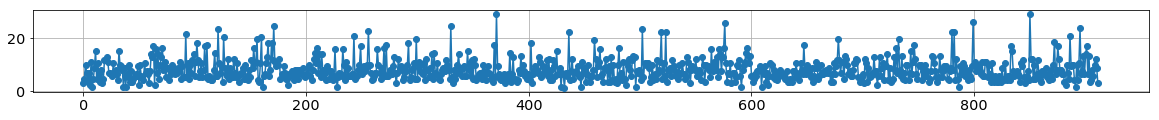

In [36]:
plt.plot(PWV,'o-')
plt.grid()

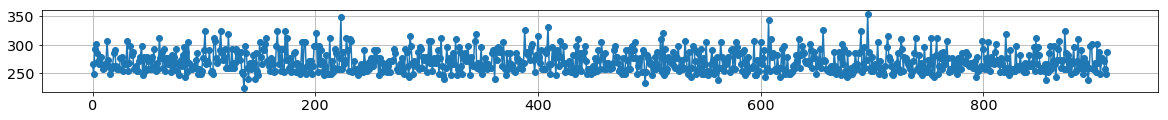

In [37]:
plt.plot(O3,'o-')
plt.grid()

(0.0, 100.0)

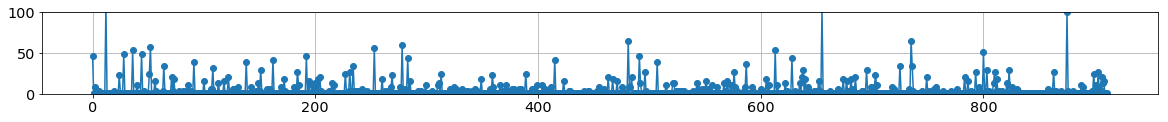

In [38]:
plt.plot(CLOUDS,'o-')
plt.grid()
plt.ylim(0.,100.)

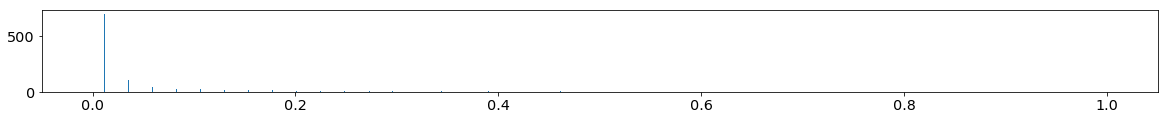

In [39]:
plt.hist(CLOUDS/100.,bins=1000,range=[0.,1.],density=True);

In [40]:
df['vaod']=VAOD
df['pwv']=PWV
df['o3']=O3
df['cloud']=CLOUDS

In [41]:
df

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity,vaod,pwv,o3,cloud
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.250,21.732956,24.241311,0.704040,0.0,0.024183,2.823083,265.663773,46.149395
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.250,21.791891,24.160844,0.859973,0.0,0.050639,4.567981,249.294686,1.183331
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.000,19.037479,23.215870,0.504610,0.0,0.066920,9.802676,292.945586,8.283236
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.000,19.223263,23.364350,0.462390,0.0,0.042499,6.894512,301.130130,1.183331
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.000,17.300000,21.767917,0.633086,0.0,0.056745,3.404716,284.761042,1.183331
5,5,141215,193,16699102,59773.276647,1.017070,y,0.752275,0.000,17.300000,21.812779,0.602145,0.0,0.058780,6.894512,271.120136,1.183331
6,6,141222,193,16699387,59773.279951,1.015315,y,0.733888,0.000,17.300000,21.839962,0.579008,0.0,0.040464,2.241450,265.663773,3.549966
7,7,141392,193,16706089,59773.357515,1.061365,y,0.704259,0.000,17.300000,21.876416,0.513673,0.0,0.058780,10.965942,268.391955,1.183331
8,8,145484,197,17047156,59777.305047,1.015333,y,1.499563,0.125,17.300000,21.064121,1.456743,0.0,0.056745,1.659818,279.304680,1.183331
9,9,145487,197,17048203,59777.317169,1.023429,y,1.389524,0.000,17.300000,21.145411,1.330707,0.0,0.060815,4.567981,257.479229,1.183331


In [42]:
df.to_csv(cadence_atm_program_file)